/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 13210.460857379318
R2 Score: 0.642992280604855


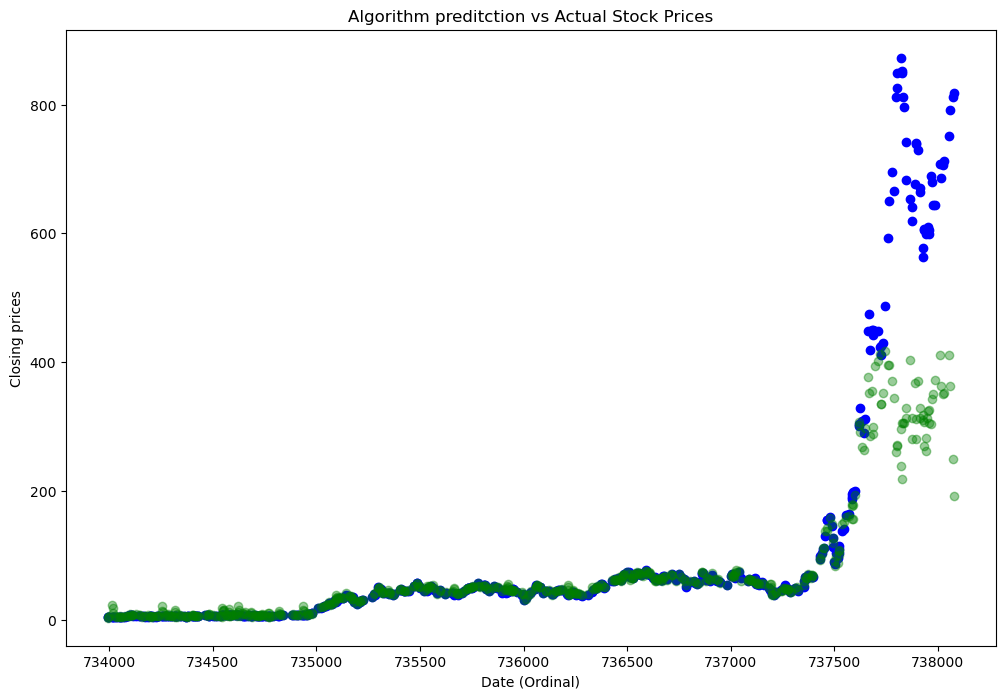

In [16]:
# First we looked at if we needed to use regression or classification algorithm. 
# We found that it is a regression problem, becuase the target variable is continous and that fits for regression algorithms. 
# Classification alghoritms are used more for categories, like the example of the computer using pixels to see if its a banana or orange.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Getting the dataset
url = 'https://raw.githubusercontent.com/bgwtb/Oblig2AI/refs/heads/main/TSLA.csv'

df = pd.read_csv(url, na_values = '')

# Converting date to datetime format and then to numerical format
df['Date'] = pd.to_datetime(df['Date'])
df['Date_Ordinal'] = df['Date'].apply(lambda x: x.toordinal())

# Input and target output. Input is the date and target output is the price.
X = df[['Date_Ordinal']]
Y = df[['Close']] # Variable in the dataset when the stock price closes for the day.

# Splitting the dataset into train and test. Using test size of 20% as this is normal in machine-learing to allow the training to get access to 80% of the data
# Use 42 as random state as it is seen as "standard"
X_Train, X_test, Y_Train, Y_Test =  train_test_split(X,Y, test_size=0.2, random_state=42)

# Using the regression algorithm with SVR and using the kernel rbf because its the default for a lot of SVM-models. 
# Using C=100 to make sure the model tries to fit the data more accurately. Using Gamma and epsilon 0.1 so its room for some erros, but it will be more or less balanced.
kernel_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
kernel_rbf.fit(X_Train, Y_Train)

# Making the predicitons based on the training
y_pred = kernel_rbf.predict(X_test)

# Evalutaing the model using the mean squared error and r2_score. Using the MSE to see the difference between the prediction and actual price
# Using the r2 score how much varinace it is in the price that is explained by the model
mse = mean_squared_error(Y_Test, y_pred)
r2 = r2_score(Y_Test, y_pred)
#Printing the values
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Visualizing the results
# Using figsize for the figure of the vizualisation
plt.figure(figsize=(12, 8))
# Using a scatter chart because it is ideal for seeing specific point. Making them different colors to show the difference and putting a label to explain
plt.scatter(X_test, Y_Test, color='blue', label='Closing Prices')
# Using alpha because the prediction is on top of the closing price and the alpha changes the transparency
plt.scatter(X_test, y_pred, color='green', label='Predicted Prices', alpha=0.4)
# Labeling to give understanding of the chart
plt.xlabel('Date (Ordinal)')
plt.ylabel('Closing prices')
plt.title('Algorithm preditction vs Actual Stock Prices')
# Showing it in the jupyter notebook
plt.show()




